In [1]:
#To start, we need to import three dependencies:

# JSON library to extract the Wikipedia data
# Pandas library to create DataFrames
# NumPy library for converting data types
# Import all three dependencies in the first cell with the following code:

import json
import pandas as pd
import numpy as np
import re


In [2]:
# import the Wikipedia JSON file. 
# define a variable file_dir for the directory that's 
# holding our data. The exact file path will depend on the
# directory in which you've saved your data. Here's what our code looks like:

file_dir = 'C:/Users/Vince/Desktop/UT Data Class/Module 8 ETL - Extract_Transform_Load'


In [3]:
f'{file_dir}filename'

'C:/Users/Vince/Desktop/UT Data Class/Module 8 ETL - Extract_Transform_Loadfilename'

In [4]:
#To load the raw JSON into a list of dictionaries, we will use the load() method.

In [5]:
# using with statement open wiki json file to be read into the variable file
# and use json.load() to save data to a new variable

with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)
    
# here, wiki_movies_raw is not a list of dicts
# now, check how many records were pulled in, using LEN function

In [6]:
len(wiki_movies_raw)

7311

In [7]:
# To see the first five records, use the following:

wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [8]:
# To see the last five records, use the following:

wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [9]:
# to see records in the middle

wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [10]:
# read csv from kaggle

kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings_small.csv')

In [11]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [13]:
# planning phase with disparate data
# 1. inspect data
# 2. make a plan after identifying the problem
# 3. execute the repair

In [14]:
# wiki_movies_raw cleanup

wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [15]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# converting lots of columns to a list of column names

wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [17]:
# Use List Comprehensions to Filter Data

# create a filter expression for ONLY movies witha  direction & imdb link
# if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie

wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
               and 'imdb_link' in movie]
len(wiki_movies)



7080

In [18]:
# create new dataframe with list comprehension to filter data

wiki_movies_1_df = pd.DataFrame(wiki_movies)

In [19]:
# row count of new dataframe

wiki_movies_1_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# removing tv shows from original list comprehension edit

wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
               and 'imdb_link' in movie
               and 'No. of episodes' not in movie ]
len(wiki_movies)


7076

In [21]:
wiki_movies_2_df = pd.DataFrame(wiki_movies)

In [22]:
wiki_movies_2_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# FUNCTIONS
# make a function that performs that cleaning process.

#Remember, functions are blocks of code within a script or algorithm that perform a specific task. There are four basic parts to a function:

# Name
# Parameters
# Code block
# Return value

#8.3.4


In [24]:
# 8.3.5 Create a Function to Clean the Data, Part 1

# write simple function to make a copy of the movie and return it

def clean_movie(movie):
    movie = dict(movie) # create a non-destuctive copy
    return movie

In [25]:
# finding movies with a specific language; arabic

wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7293,https://en.wikipedia.org/wiki/Capernaum_(film),2018.0,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# visit wiki page

wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [27]:
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [28]:
# add in code to handle the alternate titles. logic:

# 1. Make an empty dict to hold all of the alternative titles.

# def clean_movie(movie):
#     movie = dict(movie)
#     alt_titles = {}
#     return movie

# 2. Loop through a list of all alternative title keys:

# def clean_movie(movie):
#     movie = dict(movie)
#     alt_titles = {}
#     for key in ['Also known as','Arabic','Cantonese','Chinese','French',
#                 'Hangul','Hebrew','Hepburn','Japanese','Literally',
#                 'Mandarin','McCune–Reischauer','Original title','Polish',
#                 'Revised Romanization','Romanized','Russian',
#                 'Simplified','Traditional','Yiddish']:
#     return movie


#   a) Check if the current key exists in the movie object.

# def clean_movie(movie):
#     movie = dict(movie)
#     alt_titles = {}
#     for key in ['Also known as','Arabic','Cantonese','Chinese','French',
#                 'Hangul','Hebrew','Hepburn','Japanese','Literally',
#                 'Mandarin','McCune–Reischauer','Original title','Polish',
#                 'Revised Romanization','Romanized','Russian',
#                 'Simplified','Traditional','Yiddish']:
        
#         if key in movie:
            
#     return movie

#   b) If so, remove the key-value pair and add to the alternative titles dict.

# def clean_movie(movie):
#     movie = dict(movie)
#     alt_titles = {}
#     for key in ['Also known as','Arabic','Cantonese','Chinese','French',
#                 'Hangul','Hebrew','Hepburn','Japanese','Literally',
#                 'Mandarin','McCune–Reischauer','Original title','Polish',
#                 'Revised Romanization','Romanized','Russian',
#                 'Simplified','Traditional','Yiddish']:
        
#         if key in movie:
#             alt_titles[key] = movie[key]
#             movie.pop(key)
            
#     return movie


# 3. After looping through every key, add the alternative titles dict to the movie object.

def clean_movie(movie):
    movie = dict(movie)
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
            
    return movie



In [29]:
# make a list of clean movies with list comprehension

clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [30]:
# set wiki_movies_df to be the dataframe created from clean_movies and print list of columns

wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [31]:
# 8.3.6 Create a Function to Clean the Data, Part 2

In [32]:
# making a function inside of a function - modified from above:

# old function - combine alternate titles into one list

def clean_movie(movie):
    movie = dict(movie)
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
            
# new function within function - merge column names

    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaption by', 'Writer(s)')
    change_column_name('Country of Origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original Release', 'Release Date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Prodductioncompany ', 'Procution company(s)')
    change_column_name('Released', 'Release date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
            
    return movie



In [33]:
# rerun list comprehension to clean wiki_movies and recreate wiki_movies_df

clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [34]:
# removing duplicate rows
# REGEX........ 8.3.7

In [35]:
# using regex to extract imdb id

wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Productioncompany,Release date,...,Preceded by,Adaptation by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,Silver Pictures,"[July 11, 1990, (, 1990-07-11, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[Carolco Pictures, IndieProd Company]","[August 10, 1990, (, 1990-08-10, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,NaN,"[December 25, 1990, (, 1990-12-25, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,NaN,"December 19, 1990",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [36]:
# remove mostly null columns

In [37]:
# 1 way to get count of null values is list comprehension:

[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

# another way is to use a for loop and print statement

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Productioncompany ', 2532],
 ['Release date', 191],
 ['Running time', 139],
 ['Country', 388],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Country of origin', 6881],
 ['Original language(s)', 6875],
 ['Production company(s)', 6179],
 ['Original network', 6908],
 ['Original release', 6874],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Adaptation by', 7031],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process

In [38]:
# remove null values by making a list of columns with less than 90% null values
# tweak list comprehension

In [39]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

# THIS GIVES US THE COLUMNS WE WANT TO KEEP

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Productioncompany ',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Writer(s)',
 'Production company(s)',
 'imdb_id']

In [40]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [41]:
# converting tabular data to the correct data type for SQL table

In [42]:
# display data type for each column

wiki_movies_df.dtypes

# Box office should be numeric.
# Budget should be numeric.
# Release date should be a date object.
# Running time should be numeric.

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Productioncompany        object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Writer(s)                object
Production company(s)    object
imdb_id                  object
dtype: object

In [126]:
# DROP NAs from column

box_office = wiki_movies_df['Box office'].dropna()

KeyError: 'Box office'

In [44]:
# regex only works on strings - using the map() method, we can determine 
# what value is not a string

# step 1, create an 'is not a string' function

def is_not_a_string(x):
    return type(x) !=str

box_office[box_office.map(is_not_a_string)]


34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [45]:
# Having to create a new function every time we want to use the map() method
# is cumbersome and interrupts the readability of our code. 

# What we want is a stripped-down, one-line way of writing our functions. 
# Also, we don't need to use it ever again outside of our map() call, s
# o we don't need to give it a name. 

# We're talking about types of functions that will work here

# REWIND

# Remember, this is what lambda functions are made for. 
# Instead of creating a new function with a block of code and the def keyword, 
# we can create an anonymous lambda function right inside the map() call.

In [46]:
# Remember, lambda functions don't have a name (because they don't need one) 
# and automatically return a variable. They use the following syntax:

# lambda arguments: expression

# So the lambda function version of is_not_a_string() is:

# lambda x: type(x) != str

In [47]:
box_office[box_office.map(lambda x: type(x) !=str)]

# the output shows data points stored as lists


34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [48]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

# import re at beginning of workbook

In [49]:
# write regex...... 8.3.9

# Regular expressions are just strings of characters that are used as a 
# search pattern. They are used to test if strings are in a specific format 
# or contain a substring in a specific format, to extract pertinent information 
# from strings while discarding unnecessary information, 
# and to perform complicated replacements of substrings.

# different character types

# LITERAL CHARACTERS
# A regular expression made of literal characters will match any string that contains the expression as a substring.

# character types:

# \d will match any digit from 0 to 9.
# \D will match any non-digit character.
# \w matches a word character (a letter, digit, or underscore).
# \W matches any non-word character (anything other than a letter, digit, or underscore, such as spaces and punctuation).
# \s will match any whitespace character (including spaces, tabs, and newlines).
# \S will match any non-whitespace characters.

# character sets

# For example, "[ceh]at" would match '"cat", "eat", "hat", and "that", but not "rat."

# "[a-z]" matches any lowercase letter.
# "[A-Z]" matches any uppercase character.
# "[0-9]" matches any digit.

# "[a-zA-Z]" matches any lowercase or uppercase letter.
# "[a-zA-Z0-9]" matches any alphanumeric character.

# "[A-E]"would match "A", "B", "C", "D", or "E".
# "[1-3]" would match the digits "1", "2", or "3".

# The period, or dot (.), is a wildcard in regular expressions
# escapting: "ca\." will only match "ca.".

# special counting characters:

# the asterisk * says the previous character can repeat any number of times including zero
# example) ca*t" would match "cat" and "caaat" but also "fiction." If we want to specify that the character has to show up at least once, we use the plus sign: +. So, "ca+t" would match "cat" and "caaat" but not "fiction."

#  curly brackets: { } if we want to search fora  character that shows up exact number of times
# example) When we extracted the IMDb IDs, we wanted IDs that had exactly seven digits, or "\d{7}". We can also put two numbers in curly brackets, and that would match for any number of digits within that range. So, "ca{3}t" wouldn't match "cat" or "fiction" but would match "caaat." "ca{3,5}t" would match "caaat", "caaaat", and "caaaaat" but not "cat" or "caaaaaat."

# alternation | works as OR, so cat|mouse|dog is cat or mouse or dog

# string boundaries ^ (beginning) and $ (end)
# So, "^cat" would match "cat" and "catatonic," but not "concatenate." "cat$" would also match "cat" and "tomcat," but not "catatonic."

# capture groups - grouping in regex serves 2 purposes:
# 1. groups can be used to add structure to a search pattern
# 2. to define what info needs to be extracted



In [50]:
# Remember, there are two main forms the box office data is written in: 
#     "$123.4 million" (or billion), and 
#     "$123,456,789." 

# We're going to build a regular expression for each form, 
# and then see what forms are left over.

# For the first form, our pattern match string will include six elements in the following order:

# A dollar sign
# An arbitrary (but non-zero) number of digits
# An optional decimal point
# An arbitrary (but possibly zero) number of more digits
# A space (maybe more than one)
# The word "million" or "billion"

form_one = r'\$\d+\.?\d*\s*[mb]illion'

box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

# There are 3,896 box office values that match the form "$123.4 million/billion."


3896

In [51]:
# Next, we'll match the numbers of our second form, "$123,456,789." 
# In words, our pattern match string will include the following elements:

# A dollar sign
# A group of one to three digits
# At least one group starting with a comma and followed by exactly three digits

form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

# There are 1,544 box office values that match the form "$123,456,789."

1544

In [52]:
# now, which values aren't described by either forms
# create 2 boolean series and select box office values that don't match either

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)


In [53]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [54]:
# We can fix our pattern matches to capture more values by addressing 
# these issues:

In [55]:
# Some values have spaces in between the dollar sign and the number.
# Add \s* after the dollar signs.

form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'


In [56]:
# Some values use a period as a thousands separator, not a comma.
# change form_two to allow for either a comma or period as a thousands separator.
# add a negative lookahead group that looks ahead for "million" or "billion" after the number and rejects the match if it finds those strings

form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [57]:
# Some values are given as a range.
#search for any string that starts with a dollar sign and ends with a hyphen, and then replace it with just a dollar sign using the replace() method.

box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)


In [58]:
# "Million" is sometimes misspelled as "millon."
# make the second "i" optional in our match string with a question mark as follows:

form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [59]:
# extract only parts of the strings that match using the str.extract() method

box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [60]:
# now, we need a function to turn the extracted values into a numeric value
# we'll call it parse_dollars which wil take in a string and return a 
# floating point number

# start by making a skeleton function with comments explaining steps

In [66]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

    
       # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)
              
        # convert to float and multiply by a million
        value = float(s) * 10**6
        
        # return value
        return value
        
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
    
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        
        # convert to float and multiply by a billioon
        value = float(s) * 10**9
        
        # return value
        return value
        
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas
        s = re.sub('\$|,','', s)
        
        # convert to float
        value = float(s)
        
        # return value
        return value
        
    # otherwise, return NaN
    else:
        return np.nan
    

In [67]:
# we have everything we need to parse the box office values to numeric values

# first, extract values from box_office using str.extract
# then, apply parse_dollars to the first column in dataframe returned by str.extract

wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(def parse_dollars(s))

SyntaxError: invalid syntax (2167031982.py, line 6)

In [68]:
wiki_movies_df['box_office']

KeyError: 'box_office'

In [69]:
# We no longer need the Box Office column, so we'll just drop it:

wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [70]:
# parse budget data 8.3.11

# step 1: preprocess the budget data, just like box office data

# create a budget variable

budget = wiki_movies_df['Budget'].dropna()

In [71]:
# convert any lists to strings

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [72]:
# remove values between a dollar sign and a hyphen (for budgets given in ranges)

budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [73]:
# now, use same pattern matches from box office data and apply without mods to budget data

matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [74]:
# remove the citation references (numbers within a bracket)

budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Windows\Temp\ipykernel_18532\3357493548.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [75]:
# parse budget values - copy line of code used to parse box office values

wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [76]:
# We can also drop the original Budget column.

wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [77]:
# parse release date

# first, make variable that holds non-null values of release date in the dataframe
# convering the lists to strings

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [78]:
# parse the following 4 forms

# full month name, one to two digit dat, four digit year (January 1, 2000)

date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'

# four digit year, two digit month, two digit day with separator (2000-01-01)

date_form_two = r'\d{4}.[01]\d.[0123]\d'

# full month name, four digit year (January 2000)

date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'

# four digit year

date_form_four = r'\d{4}'

In [79]:
# extract the dates 

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)


,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [80]:
# use build in to_datetime() method in pandas. since there are different date
# formats, set the infer_datetime_format option to True

wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [81]:
# parse running tume
# first, make variable that holds the non-null values of release date in the
# dataframe converting list to strings

running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [82]:
# how many running times look exactly like 100 minutes

running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [83]:
# what do the other 366 entries look like?

running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [84]:
# only mark the beginning of the string and accept other abbreivation of
# minutes by only searching up to the letter "m"

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [85]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [86]:
# remaining 17 entries?

# match all the hour + minute patterns with 1 regex pattern

# start with 1 or more digits
# have optional space after digit and before the letter 'h'
# capture all possible abbvs of hours
# have optional space after hours marker
# have optional num digits for minutes

# As a pattern, this looks like "\d+\s*ho?u?r?s?\s*\d*".

In [87]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [88]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [89]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [90]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [91]:
# clean kaggle data 8.3.12

In [92]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [93]:
# look at adult columns

kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [94]:
# removing bad data

kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# this code keeps rows where adult column is false and drops the adult column

kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [96]:
# look at video columns

kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [97]:
# only false/true columns

kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [98]:
# assign boolean column to video

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [99]:
# For the numeric columns, we can just use the to_numeric() method from Pandas. We'll make sure the errors= argument is set to 'raise', so we'll know if there's any data that can't be converted to numbers.

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [100]:
# finally, convert release_date to datetime

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [101]:
# look at ratings data using info() method on the dataframe

#received error on null counts, was told to use show counts?

ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [102]:
pd.to_datetime(ratings['timestamp'], unit='s')

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
                 ...        
99999    2003-10-08 02:16:10
100000   2003-10-03 02:46:41
100001   2003-12-09 03:26:03
100002   2003-12-09 14:21:03
100003   2004-01-22 15:18:44
Name: timestamp, Length: 100004, dtype: datetime64[ns]

In [103]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count             100,004.00
mean                    3.54
std                     1.06
min                     0.50
25%                     3.00
50%                     4.00
75%                     4.00
max                     5.00
Name: rating, dtype: float64

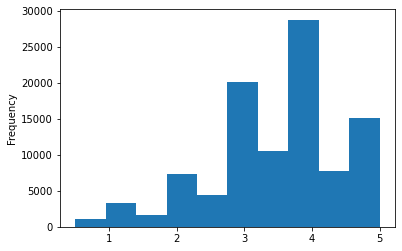

In [104]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [105]:
# merge data sets 8.4.1

In [107]:
# finding redundant columns

movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [108]:
# competing data
# wiki                     Movielens               Resolution
#-------------------------------------------------------------------------
# title_wiki               title_kaggle            Drop wikipedia
# running_time             runtime                 keep kaggle, fill in zeros with wiki data
# budget_wiki              budget_kaggle           keep kaggle, fill in zeros with wiki data  
# box_office               revenue                 keep kaggle, fill in zeros with wiki data
# release_data_wiki        release_date_kaggle     Drop wikipedia
# Languge                  original_language       Drop wikipedia
# Production company(s)    production_companies    Drop wikipedia

In [109]:
# now we compare columns

In [110]:
# first, take a look at some of the titles

movies_df[['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [111]:
# now look at rows where titles don't match

movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [113]:
# kaggle data looks more consistent, now confirm there aren't missing titles in kaggle data

movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

# No results were returned, so we can just drop the Wikipedia titles in grid 108. Note that for now, we’re merely noting the resolution.


,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Productioncompany,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='running_time', ylabel='runtime'>

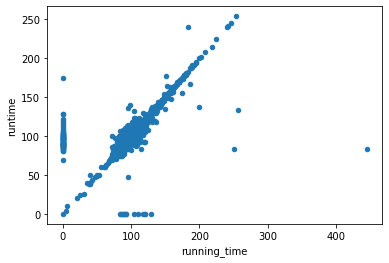

In [116]:
# running_time vs runtime - use a scatter plat to see how similar columns are to one another
# if scatter plots exactly same, we'll see a perfectly straight line

# the following will fill in missing values with zero and make the scatter plot

movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

# more data points on origin of y axis (kaggle) than x axis (wiki), therefore, more missing entries in wiki than kaggle


<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

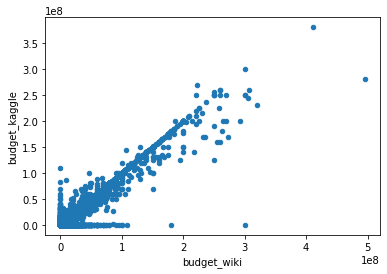

In [119]:
# budget comparison, make another scatter plot

movies_df.fillna(0).plot(x='budget_wiki', y='budget_kaggle', kind='scatter')

# questions to consider:

# Which dataset seems to have more outliers?
# Which dataset seems to have more missing data points?
# If we were to fill in the missing data points of one set with the other, which would be more likely to give us consistent data?
# Is it better to start with a base of consistent data and fill in missing points with possible outliers? Or is it better to start with a base of data with outliers and fill in missing points with more consistent data?

KeyError: 'box_office'

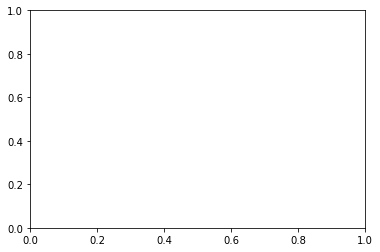

In [128]:
# box office, numeric, make another scatter

movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

# no clue why box_office isn't working


<AxesSubplot:xlabel='release_date_wiki'>

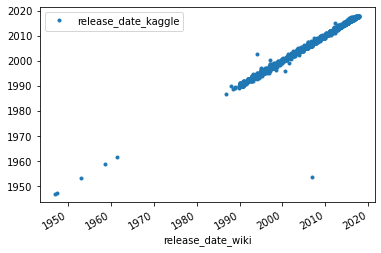

In [129]:
# compare release data
# date, so can't make a scatter plot (because it only works with numeric), but workaround

movies_df[['release_date_wiki', 'release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [130]:
# investigate outlier - choose rough cutoff dates to single out the one movie

movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

# data reveals the holiday was merged with from here to eternity
# drop data frame by indexing it:

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Productioncompany,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[Relativity Media, Waverly Films]","[December 8, 2006, (, 2006-12-08, )]",United States,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [131]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [132]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [133]:
# after drop, check for nulls

movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Productioncompany,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
22,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",Peter Smokler,NaN,NaN,NaN,...,1990-09-23,0.00,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Camp Cucamonga,False,4.70,9.00
24,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,NaN,NaN,NaN,NaN,NaN,NaN,...,1990-04-21,0.00,26.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Drugs don't stand a chance against these guys!,Cartoon All-Stars to the Rescue,False,6.00,5.00
28,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",Geoffrey Schaaf,NaN,NaN,NaN,...,1990-01-31,0.00,97.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Every year, Officer Donnelly goes to China Lak...",The China Lake Murders,False,0.00,0.00
186,https://en.wikipedia.org/wiki/Treasure_Island_...,1990,https://www.imdb.com/title/tt0100813/,Treasure Island,NaN,"[Charlton Heston, Christian Bale, Oliver Reed,...",Robert Steadman,NaN,NaN,NaN,...,1990-06-08,0.00,131.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sail the high seas. Battle the pirates. Live t...,Treasure Island,False,5.60,36.00
330,https://en.wikipedia.org/wiki/Perfect_Harmony_...,1991,https://www.imdb.com/title/tt0102653/,Perfect Harmony,NaN,NaN,Robert D. Yeoman,NaN,NaN,NaN,...,1991-03-31,0.00,89.00,[],Released,NaN,Perfect Harmony,False,3.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,NaN,"[Michael Madsen, Ron Livingston]",David Franco,NaN,NaN,NaN,...,2003-01-01,0.00,103.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,44 Minutes: The North Hollywood Shoot-Out,False,6.40,17.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,NaN,"[Denmark, USA, UK]",...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3390,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,NaN,Bob Dylan,Mustapha Barat,NaN,NaN,NaN,...,2005-07-21,0.00,208.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bob Dylan. Songwriter. Rocker. Rebel. Legend.,No Direction Home: Bob Dylan,False,7.50,33.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,NaN,United States,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [134]:
# compare language

movies_df['Language'].value_counts()

English                        5479
[English, Spanish]               68
[English, French]                35
[English, Japanese]              25
[English, Russian]               23
                               ... 
[English /, Zulu]                 1
[English, Hebrew, Spanish]        1
[English, Japanese, French]       1
[English, Spanish, Apache]        1
Russian                           1
Name: Language, Length: 197, dtype: int64

In [135]:
# putting analysis together

# competing data
# wiki                     Movielens               Resolution
#-------------------------------------------------------------------------
# title_wiki               title_kaggle            Drop wikipedia
# running_time             runtime                 keep kaggle, fill in zeros with wiki data
# budget_wiki              budget_kaggle           keep kaggle, fill in zeros with wiki data  
# box_office               revenue                 keep kaggle, fill in zeros with wiki data
# release_data_wiki        release_date_kaggle     Drop wikipedia
# Languge                  original_language       Drop wikipedia
# Production company(s)    production_companies    Drop wikipedia



In [136]:
# drop unnecessary table

movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

In [137]:
# make function that fills in missing data for a column pair and drops redundant option

def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki+column, inplace=True)

In [142]:
# now run function for the three column pairs that we decided to fill in the zeros
# code not working

#fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
#fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
#fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
#movies_df

In [143]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [144]:
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [145]:
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]


In [146]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)